In [6]:
import numpy as np
import numpy.random as rd
import sys
import matplotlib.pyplot as plt
import time

rd.seed(7777)

dataset_num = 2000
variance = 0.4
wtflag = 0
file_exist = False


'''dataset_num = 100
variance = 0.5
wtflag = 0
learning_rate = 0.2
file_exist = False

epochs = 500  -> 75%
[[3, 'True', 'relu'],[50, 'True', 'relu'], [50, 'True', 'relu'], [2, 'False', 'sigmoid']]


dataset_num = 80
variance = 0.5
wtflag = 0
learning_rate = 0.5
file_exist = False

epochs = 1200
test = NN(t_x_data, t_y_data, test_x_data, test_y_data, [[2, 'True', 'relu'],[30, 'True', 'relu'],[30, 'True', 'relu'], [30, 'True', 'relu'], [1, 'False', 'sigmoid']], learning_rate=learning_rate)
'''


# making dataset
def making_data_set(d_num):
    d_set = np.empty(1)
    if file_exist:
        tmp = np.load(sys.argv[1])
        d_set = np.append(d_set, tmp)
    else:
        for i in range(int(d_num)):
            b0 = int(rd.randint(0, 2, 1))
            b1 = int(rd.randint(0, 2, 1))
            b2 = int(rd.randint(0, 2, 1))
            
            x = rd.normal(b0*2 - 1, variance)
            y = rd.normal(b1*2 -1, variance)
            z = rd.normal(b2*2-1, variance)
            
            result = b0 + b1 + b2
            
            rb0 = result % 2
            rb1 = int(result/2) % 2
            d_set = np.append(d_set, [[x, y, z, rb0, rb1]])
            '''x = rd.randint(0, 2, 1)
            y = rd.randint(0, 2, 1)
            rst = x | y
            
            d_set = np.append(d_set, [x, y, rst])'''
    d_set = np.delete(d_set, 0, axis=0)
    d_set = d_set.reshape(-1, 5)
    #d_set = d_set.reshape(-1, 3)
    return d_set
t_data = making_data_set(dataset_num).astype(np.float32)
t_x_data = t_data[:, 0:-2]
t_y_data = t_data[:, -2:].reshape(-1, 2)

test_data = making_data_set(100).astype(np.float32)
test_x_data = test_data[:, 0:-2]
test_y_data = test_data[:, -2:].reshape(-1, 2)

'''t_data = making_data_set()
t_x_data = t_data[:, 0:-1]
t_y_data = t_data[:, -1].reshape(-1, 1)

test_data = making_data_set()
test_x_data = t_data[:, 0:-1]
test_y_data = t_data[:, -1].reshape(-1, 1)'''


print(f"x test data : \n{test_x_data.dtype}\n y test data : \n {test_y_data.shape}\n")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class layer_class:
    def sigmoid(self, a):
        return 1/(1 + np.exp(-a)) 
    def relu(self, b):
        return np.where(b < 0, 0, b)
    def dsigmoid(self, a):
        return a * (1 - a)
    def drelu(self, a):
        return np.where( a<0, 0, 1)

    
    w = np.array([]); bias = 'False'; ftn = sigmoid; dftn = dsigmoid; b = np.array([]);  dataflow = np.array([]);  delta = np.array([])
    def __init__(self, w, bias='False', activation = 'sigmoid'):
        self.w = w
        if bias == 'True':
            self.bias = 'True'
            self.b = np.zeros((1, w.shape[1]))
        else:
            self.bias = 'False'
        if activation == 'sigmoid':
            self.ftn = self.sigmoid
            self.dftn = self.dsigmoid
        elif activation == 'relu':
            self.ftn = self.relu
            self.dftn = self.drelu







x test data : 
float32
 y test data : 
 (100, 2)



In [7]:
epochs = 500
batch = 5
learning_rate = 0.005
end_learning_rate = 0.003
result_mean = 0.5


epochs : 0	 train_loss :0.7435	 test_loss :0.2766	 train_accuracy :54.1%	 test_accuracy :51.0%
epochs : 50	 train_loss :0.3689	 test_loss :0.1356	 train_accuracy :84.2%	 test_accuracy :78.5%
epochs : 100	 train_loss :0.2745	 test_loss :0.1047	 train_accuracy :89.5%	 test_accuracy :87.0%
epochs : 150	 train_loss :0.218	 test_loss :0.08204	 train_accuracy :93.4%	 test_accuracy :94.0%
epochs : 200	 train_loss :0.1718	 test_loss :0.06143	 train_accuracy :95.9%	 test_accuracy :95.5%
epochs : 250	 train_loss :0.135	 test_loss :0.04681	 train_accuracy :96.8%	 test_accuracy :95.0%
epochs : 300	 train_loss :0.1078	 test_loss :0.03783	 train_accuracy :97.8%	 test_accuracy :96.5%
epochs : 350	 train_loss :0.08751	 test_loss :0.03166	 train_accuracy :98.6%	 test_accuracy :97.0%
epochs : 400	 train_loss :0.07449	 test_loss :0.0273	 train_accuracy :98.9%	 test_accuracy :97.0%
epochs : 450	 train_loss :0.06581	 test_loss :0.02441	 train_accuracy :98.8%	 test_accuracy :97.0%
 excutive time : 54.202623

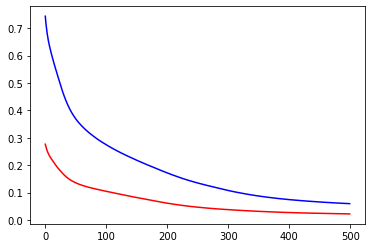

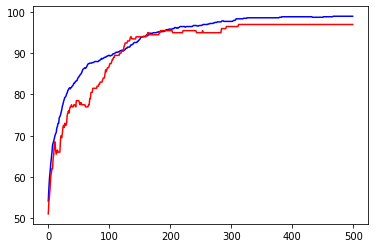

In [8]:
rd.seed(777)
class NN:
    train_set_x, train_set_y, test_set_x, test_set_y, learning_rate, end_learning_rate, activate = np.array([]), np.array([]), np.array(
        []), np.array([]), 0, 0, 'sigmoid'
    layer, train_loss, test_loss, train_accuracy, test_accuracy = [], [], [], [], []
    feature = []
    batch = 1
    # 추적
    weight_hist = []
    delta_hist = []
    bias_hist = []

    def __init__(self, train_set_x, train_set_y, test_set_x, test_set_y, feature, learning_rate=0.01,\
                 end_learning_rate = 0.01, batch=1):
        self.learning_rate = learning_rate
        self.end_learning_rate = end_learning_rate
        self.train_set_x = train_set_x
        self.train_set_y = train_set_y
        self.test_set_x = test_set_x
        self.test_set_y = test_set_y
        self.feature = feature
        self.batch = batch
        # w initialization sigmoid use xavier initialization  Relu using He initialization
        for i, f in enumerate(self.feature):
            if i == (len(self.feature) - 1):
                break
            w = 0
            if f[2] is 'sigmoid':
                #w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(1 / (f[0] + self.feature[i + 1][0]))
                w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(1 / (f[0] ))
            elif f[2] is 'relu':
                #w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(2 / (f[0] + self.feature[i + 1][0]))
                w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(2 / (f[0]))
            self.layer.append(layer_class(w, f[1], f[2]))

    def forwarding(self, x_data, y_data):
        for i, k in enumerate(self.layer):
            a = np.array([])
            # 첫단에만 input
            a = np.append(a, np.dot(x_data, k.w)).reshape(x_data.shape[0], k.w.shape[1]) if i == 0 \
                        else np.append(a, np.dot(self.layer[i - 1].dataflow, k.w)).reshape(x_data.shape[0], k.w.shape[1])
            #bias 추가
            if k.bias == 'True':
                a = np.multiply(np.ones((int(x_data.shape[0]), int(k.w.shape[1]))), k.b) + a
            k.dataflow = k.ftn(a)


    def backpropagation(self, x_data, y_data, lr):
        for i, L in reversed(list(enumerate(self.layer))):
            #delta구하기, 마지막 단만 cross entropy derivation 값
            L.before_w = L.w
            L.delta = y_data - L.dataflow if i is (len(self.layer) - 1) \
                                        else np.multiply(L.dftn(L.dataflow), \
                                        np.dot(self.layer[i + 1].delta, self.layer[i + 1].before_w.T))

            # i가 0 이면 input data가 train_set
            inputt = x_data if i ==0 else self.layer[i - 1].dataflow
            
            '''x_k * delta -> upgrade할 weight'''
            upgrade_w = np.array([np.outer(inputt[k], L.delta[k]) for k in range(L.delta.shape[0])])\
                        .reshape(-1, L.w.shape[0], L.w.shape[1])
            
            """update bias"""
            if L.bias == 'True':
                L.b = L.b + L.delta * self.learning_rate
            """update weight"""
            L.w = L.w + np.average(upgrade_w, axis=0) * self.learning_rate
            
            
    def training(self, epochs):
        for i in range(epochs):
            for j in range(self.batch):
                x_data = self.train_set_x[
                         int(len(self.train_set_x) / self.batch) * j: int(len(self.train_set_x) / self.batch) * (j + 1),
                         :]
                y_data = self.train_set_y[
                         int(len(self.train_set_y) / self.batch) * j: int(len(self.train_set_y) / self.batch) * (j + 1),
                         :]
                lr = self.learning_rate + (self.end_learning_rate - self.learning_rate) / epochs
                self.forwarding(x_data, y_data)
                self.backpropagation(x_data, y_data, lr)
            self.data_save(self.test_set_x, self.test_set_y)

            # print(f"bias : {self.layer[0].b}")
            if i % 50 == 0:
                print(f"epochs : {i}\t train_loss :{self.train_loss[i]:.4}\t test_loss :{self.test_loss[i]:.4}\t train_accuracy :{self.train_accuracy[i]:.3}%\t test_accuracy :{self.test_accuracy[i]:.3}%")

    def plot(self):

        plt.figure()
        plt.plot(self.train_loss, 'b')
        plt.plot(self.test_loss, 'r')
        plt.show()

        plt.figure()
        plt.plot(self.train_accuracy, 'b')
        plt.plot(self.test_accuracy, 'r')
        plt.show()

        ''' plt.figure()
        plt.plot(self.weight_hist)
        plt.plot(self.delta_hist)
        plt.show()'''

        '''plt.figure()
        plt.plot(self.bias_hist)
        plt.show()'''

    def data_save(self, x_data, y_data):
        #train loss, accuracy 구하기
        predict = self.layer[-1].dataflow
        y = self.train_set_y[-int(len(self.train_set_y) / self.batch):, :]
        train_loss = np.average( -(y*np.log(predict + 1e-7) + (1-y)*np.log(1-predict+ 1e-7) ))
        self.train_loss.append(train_loss)
        
        train_result = np.equal(y, np.array([self.layer[-1].dataflow > result_mean]))
        train_correct = np.average(train_result) * 100
        self.train_accuracy.append(train_correct)
        
        for i, k in enumerate(self.layer):
            a = np.array([])
            if i is 0:
                a = np.append(a, np.dot(x_data, k.w))
            else:
                a = np.append(a, np.dot(self.layer[i - 1].dataflow, k.w))

            a = a.reshape(self.test_set_x.shape[0], k.w.shape[1])
            # print(a.shape)
            k.dataflow = k.ftn(a)
            
            if i == 0:
                self.weight_hist.append(k.w.reshape(-1))
                self.delta_hist.append(k.delta.reshape(-1))
                if k.bias is "True":
                    self.bias_hist.append(k.b.reshape(-1))
                    
        self.test_loss = np.append(self.test_loss, np.average((self.layer[-1].dataflow - y_data)**2))

        # print(self.layer[-1].dataflow)
        # result = np.array([self.layer[-1].dataflow > 0.5])
        result = np.array([self.layer[-1].dataflow > result_mean])
        cnt = np.equal(self.test_set_y, result)
        # print(f"ny_data : \n{self.test_set_y}\n\n y^ : \n{self.layer[-1].dataflow}")
        correct = np.average(cnt) * 100
        self.test_accuracy.append(correct)


test = NN(t_x_data, t_y_data, test_x_data, test_y_data, \
          [[3, 'True', 'relu'], [30, 'True', 'relu'],[30, 'True', 'relu'],[30, 'True', 'relu'],\
           [30, 'True', 'sigmoid'],\
           [2, 'False', 'sigmoid']], \
          learning_rate=learning_rate, batch=batch)

start_time = time.time()
test.training(epochs)
end_time = time.time()

print(f" excutive time : {end_time - start_time}")
test.plot()

In [15]:
upgrade_w = np.zeros(1)
# outer로 한꺼번에 추가후에, reshape로 정렬
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 25], [100, 10000]])
print(np.outer(b, a))
upgrade_w = np.append(upgrade_w, np.outer(b, a))

print(upgrade_w)
    # print(f" for {i} layer **********************\ndelta : \n{L.delta[k]}\n input : \n{input[k]}\n result : \n{np.outer(input[k], L.delta[k])}")
upgrade_w = np.delete(upgrade_w, 0, axis=0)
upgrade_w = upgrade_w.reshape(-1, a.shape[0], a.shape[1])
upgrade_w

[[    5    10    15    20]
 [   25    50    75   100]
 [  100   200   300   400]
 [10000 20000 30000 40000]]
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 2.5e+01 5.0e+01 7.5e+01 1.0e+02
 1.0e+02 2.0e+02 3.0e+02 4.0e+02 1.0e+04 2.0e+04 3.0e+04 4.0e+04]


array([[[5.0e+00, 1.0e+01],
        [1.5e+01, 2.0e+01]],

       [[2.5e+01, 5.0e+01],
        [7.5e+01, 1.0e+02]],

       [[1.0e+02, 2.0e+02],
        [3.0e+02, 4.0e+02]],

       [[1.0e+04, 2.0e+04],
        [3.0e+04, 4.0e+04]]])

In [53]:
a = np.array([[1, 3], [2, 4]])
b = np.array([[5, 25], [0.1 , 0.2]])
#c = np.array(a[i] * b for i in range(a.shape[0]))
#c = np.zeros((2, 1))
c = np.array([[a[:,i] * b[j, :] for j in range(b.shape[0])] for i in range(a.shape[0]) ])
c

array([[[  5. ,  50. ],
        [  0.1,   0.4]],

       [[ 15. , 100. ],
        [  0.3,   0.8]]])

In [47]:
a = np.array([[1, 3], [2, 4]])
b = np.array([[5, 25], [0.1 , 0.2]])

c = np.zeros((2,1))
for i in range(a.shape[0]):
    c = np.append(c, np.array([a[:,i] * b.T]))
c

array([ 0. ,  0. ,  5. ,  0.2, 25. ,  0.4, 15. ,  0.4, 75. ,  0.8])

In [105]:
a = np.array([[1, 0], [0, 1]])
b = np.array([[0.3, 0.1], [0.1 , 0.9]])
c = -(a*np.log(b) + (1-a)*np.log(1-b))
np.average(c)

0.3800135878248538